<h2 style='color:purple' align='center'>Pokemon Image Classifier</h2>

<p><b>
Explore the dataset and explore different pokemon. Create a Pokemon Classifier which classifies different pokemon like Pikachu, Bulbasaur, and Charmander.
</b></p>

### 1. Importing Libraries

In [96]:
import numpy as np
import pandas as pd
import os
from pathlib import Path 
from keras.preprocessing import image # only for reading image
import matplotlib.pyplot as plt

<br>

### 2. Importing Dataset

In [97]:
train_df = pd.read_csv(r"C:\Users\User\Desktop\Machine Learning Projects\K Nearest Neighbor\1. Pokemon Image Classifier\Train\train.csv")

In [98]:
test_df = pd.read_csv(r"C:\Users\User\Desktop\Machine Learning Projects\K Nearest Neighbor\1. Pokemon Image Classifier\Test\New Test.csv")

In [99]:
train_df.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [100]:
test_df.head()

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu


In [101]:
train_df["NameOfPokemon"].unique()

array(['Pikachu', 'Bulbasaur', 'Charmander'], dtype=object)

In [102]:
labels_dict = {"Pikachu":0, "Bulbasaur":1, "Charmander":2}
label2Pokemon = {0:"Pikachu", 1:"Bulbasaur", 2:"Meowth"}

In [103]:
# converting images into data matrix

train_image_data = []
train_labels = []

p = Path("./Train/Images")
dirs = p.glob("*")
imagecount = 0

for img_path in dirs:
    
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
        
    train_image_data.append(img_array)
    train_labels.append(labels_dict[train_df['NameOfPokemon'].iloc[imagecount]])

    imagecount += 1      
    
print("Total Train Images : " + str(imagecount))

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Total Train Images : 304


In [104]:
X_train = train_image_data
y_train = train_labels

In [105]:
# converting images into data matrix

test_image_data = []

imagecount = 0
img_path = "Test\\Images\\"

for imageId in test_df['ImageId']:
    
    img = image.load_img(img_path + imageId, target_size=(100, 100))
    img_array = image.img_to_array(img)
        
    test_image_data.append(img_array)

    imagecount += 1
        
print("Total Test Images : " + str(imagecount))
        

Total Test Images : 123


In [106]:
X_test = test_image_data

y_test = test_df['NameOfPokemon'].map(labels_dict)
y_test = np.array(y_test)

#y_test

<br>

### 3. Analyzing Different Images of Pokemons

In [107]:
# Draw some pokemons 
def drawImage(img, label):
    plt.title(label2Pokemon[label])
    plt.imshow(img)
    plt.show()

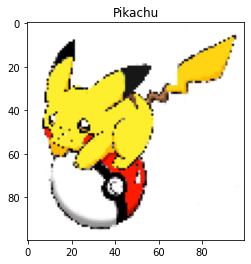

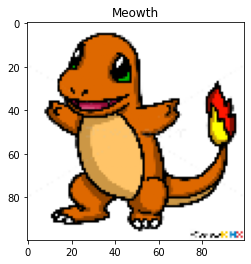

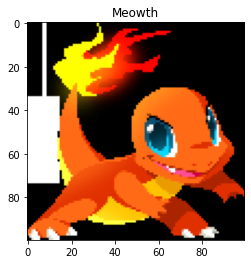

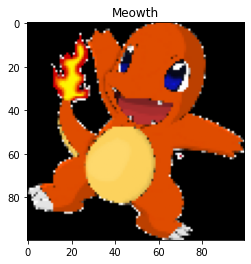

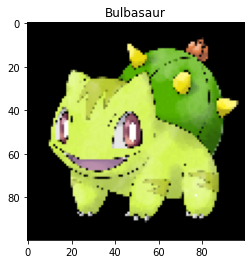

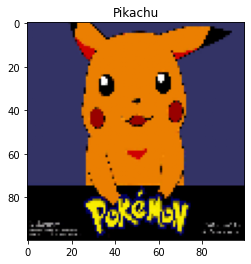

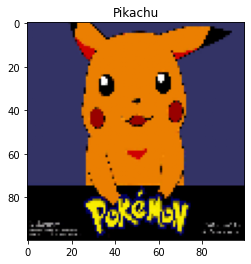

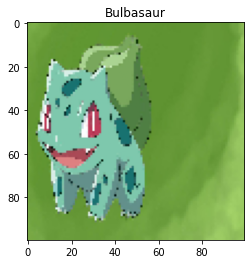

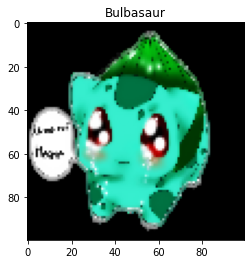

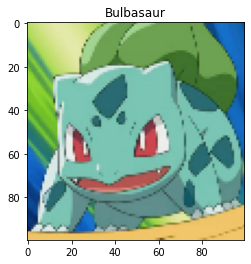

In [108]:
for i in range(10):
    rand_index = np.random.randint(303)
    drawImage(X_train[rand_index]/255.0, y_train[rand_index])

<br>

### 4. Performing Data Normalization

In [109]:
flatten_train = []

for currentMatrix in X_train:
    flatten_train.append(currentMatrix.flatten())

X_train = np.array(flatten_train)
y_train = np.array(y_train)
X_train

array([[145., 190., 232., ...,  79., 139., 211.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 250., 250., 250.]], dtype=float32)

In [110]:
from sklearn import preprocessing

X_train = preprocessing.normalize(X_train)
X_train

array([[0.00496756, 0.00650921, 0.00794809, ..., 0.00270646, 0.004762  ,
        0.00722865],
       [0.00650891, 0.00650891, 0.00650891, ..., 0.00650891, 0.00650891,
        0.00650891],
       [0.00661305, 0.00661305, 0.00661305, ..., 0.00661305, 0.00661305,
        0.00661305],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00694258, 0.00694258, 0.00694258, ..., 0.00694258, 0.00694258,
        0.00694258],
       [0.00677234, 0.00677234, 0.00677234, ..., 0.00663955, 0.00663955,
        0.00663955]], dtype=float32)

In [111]:
flatten_test = []

for currentMatrix in X_test:
    flatten_test.append(currentMatrix.flatten())

X_test = np.array(flatten_test)
y_test = np.array(y_test)
X_test

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [217., 217., 217., ..., 217., 217., 217.],
       [ 48., 128., 104., ..., 172., 208.,  88.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

In [112]:
# X_test = preprocessing.normalize(X_test)
# len(X_test)

In [113]:
len(y_test)

123

### 5. Train and Test Data

In [114]:
from sklearn.neighbors import KNeighborsClassifier 

In [115]:
knn = KNeighborsClassifier(n_neighbors=1) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
# print(knn.predict(X_test)) 

print("Model Accuracy : " + str(knn.score(X_test, y_test) * 100) + " %")

Model Accuracy : 95.1219512195122 %
